In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
data = pd.read_csv("Cryptocurrency Data.csv")
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,05-10-2020 23:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,06-10-2020 23:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,07-10-2020 23:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,08-10-2020 23:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,09-10-2020 23:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
37077,2889,XRP,XRP,02-07-2021 23:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,2890,XRP,XRP,03-07-2021 23:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,2891,XRP,XRP,04-07-2021 23:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,2892,XRP,XRP,05-07-2021 23:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


In [62]:
data.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,37082.000000,37082.000000,37082.000000,37082.000000,37082.000000,3.708200e+04,3.708200e+04
mean,1056.699018,1016.058015,952.987707,985.323755,987.120511,3.022542e+09,1.542943e+10
std,755.992373,5249.503670,4907.932082,5088.101367,5093.703878,1.190963e+10,7.059128e+10
min,1.000000,0.000089,0.000079,0.000086,0.000086,0.000000e+00,0.000000e+00
25%,420.000000,0.075664,0.069536,0.072456,0.072648,4.937190e+06,2.395955e+08
50%,910.000000,1.008733,0.999850,1.001157,1.001138,8.512805e+07,1.405335e+09
75%,1585.000000,31.916399,28.996246,30.459673,30.512205,9.388489e+08,5.159305e+09
max,2991.000000,64863.098910,62208.964370,63523.754870,63503.457930,3.509680e+11,1.186360e+12


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37082 entries, 0 to 37081
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        37082 non-null  int64  
 1   Name       37082 non-null  object 
 2   Symbol     37082 non-null  object 
 3   Date       37082 non-null  object 
 4   High       37082 non-null  float64
 5   Low        37082 non-null  float64
 6   Open       37082 non-null  float64
 7   Close      37082 non-null  float64
 8   Volume     37082 non-null  float64
 9   Marketcap  37082 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.8+ MB


In [64]:
data.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [65]:
data2 = data.groupby(data["Name"])[["High","Low","Open","Close"]].sum()
data2

,High,Low,Open,Close
Name,,,,
Aave,7.460936e+04,6.537741e+04,6.998934e+04,7.026961e+04
Binance Coin,7.896983e+04,7.089710e+04,7.502471e+04,7.534494e+04
Bitcoin,2.061794e+07,1.939965e+07,2.004014e+07,2.007347e+07
Cardano,3.707145e+02,3.293613e+02,3.507638e+02,3.521736e+02
Chainlink,9.187199e+03,8.200540e+03,8.717856e+03,8.737387e+03
Cosmos,6.034726e+03,5.380393e+03,5.712112e+03,5.719044e+03
Crypto.com Coin,7.991201e+01,7.345804e+01,7.648488e+01,7.658814e+01
Dogecoin,4.130122e+01,3.422979e+01,3.772749e+01,3.798488e+01
EOS,7.094647e+03,6.427404e+03,6.777749e+03,6.778913e+03


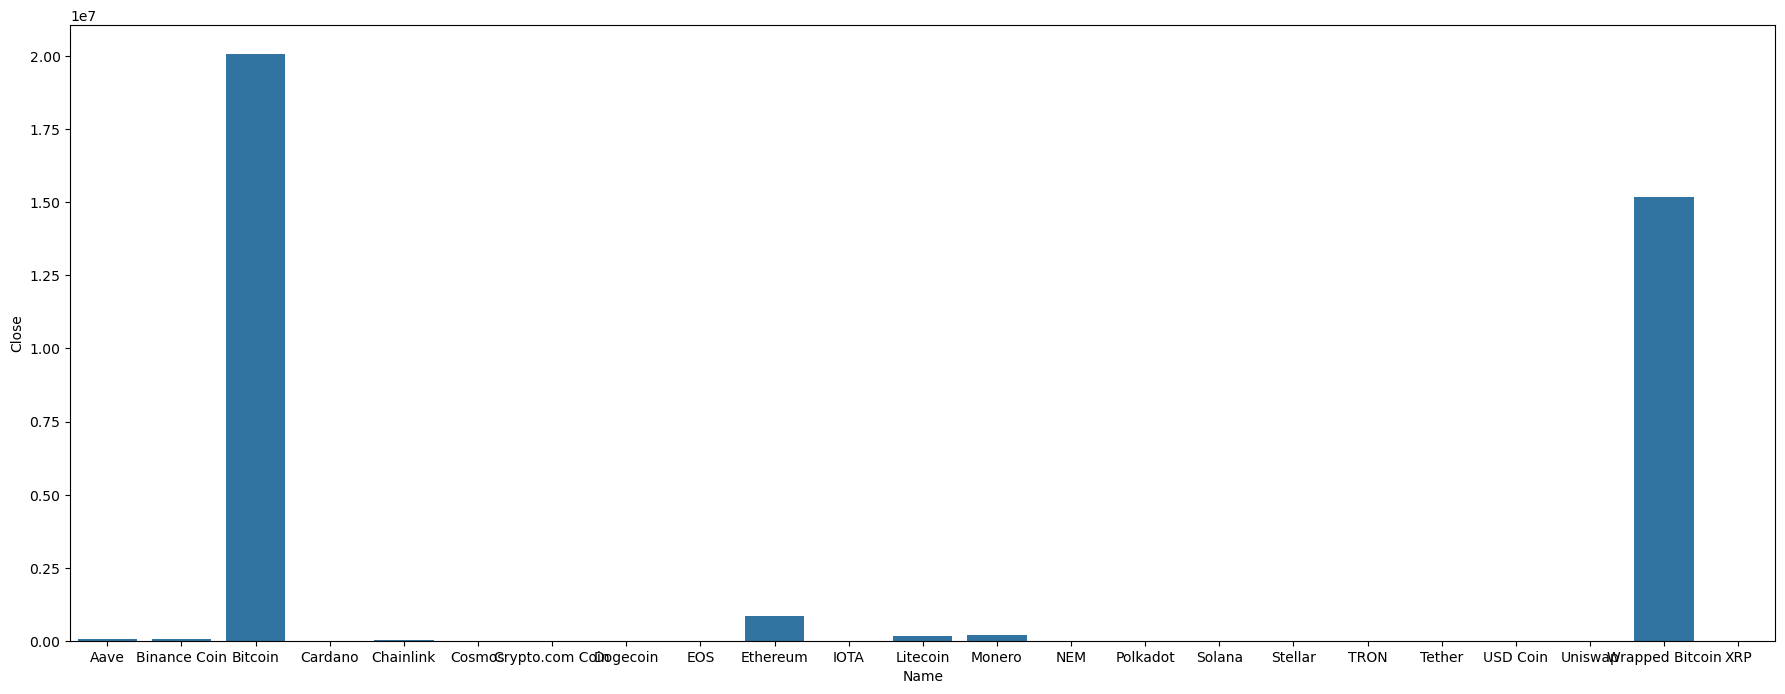

In [66]:
plt.figure(figsize = (22,8))
sns.barplot(x = data2.index, y = data2["Close"] , data = data2,orient = "v")
plt.show()

In [129]:
data2["High(%)"] = (data2["High"]/sum(data2["High"]) * 100).round()
data2

,High,Low,Open,Close,High(%)
Name,,,,,
Aave,7.460936e+04,6.537741e+04,6.998934e+04,7.026961e+04,0.0
Binance Coin,7.896983e+04,7.089710e+04,7.502471e+04,7.534494e+04,0.0
Bitcoin,2.061794e+07,1.939965e+07,2.004014e+07,2.007347e+07,55.0
Cardano,3.707145e+02,3.293613e+02,3.507638e+02,3.521736e+02,0.0
Chainlink,9.187199e+03,8.200540e+03,8.717856e+03,8.737387e+03,0.0
Cosmos,6.034726e+03,5.380393e+03,5.712112e+03,5.719044e+03,0.0
Crypto.com Coin,7.991201e+01,7.345804e+01,7.648488e+01,7.658814e+01,0.0
Dogecoin,4.130122e+01,3.422979e+01,3.772749e+01,3.798488e+01,0.0
EOS,7.094647e+03,6.427404e+03,6.777749e+03,6.778913e+03,0.0


In [132]:
filtered_data = data2[data2['High(%)'] > 0]
filtered_data

,High,Low,Open,Close,High(%)
Name,,,,,
Bitcoin,2.061794e+07,1.939965e+07,2.004014e+07,2.007347e+07,55.0
Ethereum,8.602385e+05,7.896800e+05,8.270206e+05,8.292471e+05,2.0
Monero,2.012846e+05,1.833929e+05,1.927281e+05,1.928987e+05,1.0
Wrapped Bitcoin,1.564575e+07,1.464892e+07,1.514277e+07,1.517288e+07,42.0


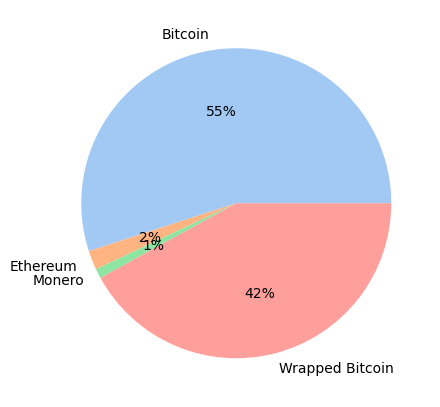

In [135]:
plt.figure(figsize = (5,8))
colors = sns.color_palette('pastel')[0:len(data["Name"])]
plt.pie(filtered_data["High(%)"], labels=filtered_data.index, colors=colors, autopct='%.0f%%')
plt.show()

In [67]:
data.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [68]:
data["Date"] = pd.to_datetime(data["Date"],format='%d-%m-%Y %H:%M').dt.date
data["time"] = pd.to_datetime(data["Date"],format='%d-%m-%Y %H:%M:%S').dt.time
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,time
0,1,Aave,AAVE,2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07,00:00:00
1,2,Aave,AAVE,2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07,00:00:00
2,3,Aave,AAVE,2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07,00:00:00
3,4,Aave,AAVE,2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08,00:00:00
4,5,Aave,AAVE,2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
37077,2889,XRP,XRP,2021-07-02,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10,00:00:00
37078,2890,XRP,XRP,2021-07-03,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10,00:00:00
37079,2891,XRP,XRP,2021-07-04,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10,00:00:00
37080,2892,XRP,XRP,2021-07-05,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10,00:00:00


In [69]:
data.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
time          object
dtype: object

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Name'] = le.fit_transform(data['Name'])
data['Symbol'] = le.fit_transform(data['Symbol'])
data['time'] = le.fit_transform(data['time'])
data['Date'] = le.fit_transform(data['Date'])
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,time
0,1,0,0,2716,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07,0
1,2,0,0,2717,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07,0
2,3,0,0,2718,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07,0
3,4,0,0,2719,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08,0
4,5,0,0,2720,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
37077,2889,22,22,2986,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10,0
37078,2890,22,22,2987,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10,0
37079,2891,22,22,2988,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10,0
37080,2892,22,22,2989,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10,0


In [71]:
correlation_matrix = data.corr()
correlation_matrix

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,time
SNo,1.000000,0.043282,0.133749,0.475975,0.157022,0.157961,0.157665,0.157701,0.348950,0.320531,NaN
Name,0.043282,1.000000,0.864905,-0.043282,-0.028331,-0.029031,-0.028898,-0.028878,0.001296,-0.194973,NaN
Symbol,0.133749,0.864905,1.000000,-0.133750,-0.061512,-0.062157,-0.061936,-0.061954,-0.034876,-0.177647,NaN
Date,0.475975,-0.043282,-0.133750,1.000000,0.163859,0.164153,0.163942,0.164029,0.235621,0.163593,NaN
High,0.157022,-0.028331,-0.061512,0.163859,1.000000,0.998618,0.999108,0.999078,0.286502,0.687639,NaN
Low,0.157961,-0.029031,-0.062157,0.164153,0.998618,1.000000,0.999181,0.999477,0.284202,0.687548,NaN
Open,0.157665,-0.028898,-0.061936,0.163942,0.999108,0.999181,1.000000,0.998971,0.286109,0.687754,NaN
Close,0.157701,-0.028878,-0.061954,0.164029,0.999078,0.999477,0.998971,1.000000,0.285777,0.688460,NaN
Volume,0.348950,0.001296,-0.034876,0.235621,0.286502,0.284202,0.286109,0.285777,1.000000,0.486652,NaN
Marketcap,0.320531,-0.194973,-0.177647,0.163593,0.687639,0.687548,0.687754,0.688460,0.486652,1.000000,NaN


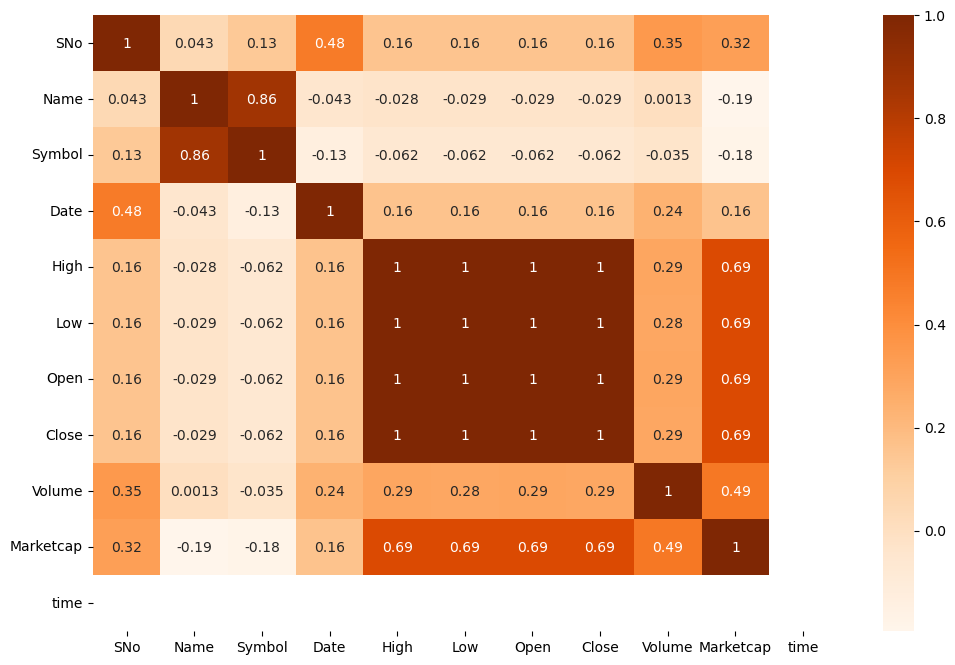

In [75]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap = "Oranges" , annot=True)
plt.show()

Forecasted Volumes: 37082    2.086249e+09
37083    2.110119e+09
37084    2.113988e+09
37085    2.114615e+09
37086    2.114716e+09
Name: predicted_mean, dtype: float64


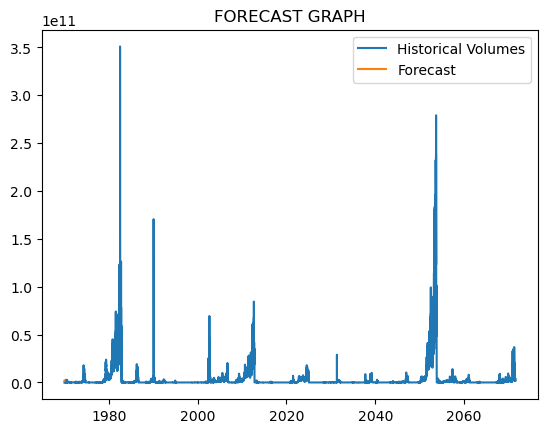

In [12]:
# Fit ARIMA model
model = ARIMA(data['Volume'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 5 days
forecast = model_fit.forecast(steps = 5)
print("Forecasted Volumes:", forecast)

# Plotting the forecast
plt.plot(data.index, data['Volume'], label='Historical Volumes')  # Ensure historical data uses the correct index
plt.plot( pd.date_range(start=data.index[-1], periods=6, freq='D')[1:] ,forecast, label='Forecast')  # Match forecast dates with forecast values
plt.legend()
plt.title("FORECAST GRAPH")
plt.show()

In [82]:
test = data["Volume"][-5:]  
test

37077    2.061607e+09
37078    1.872820e+09
37079    1.885242e+09
37080    2.076373e+09
37081    1.938959e+09
Name: Volume, dtype: float64

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 140937397.61413088
MSE: 2.831926167453371e+16
RMSE: 168283278.05974576
